## Libraries and Data Import

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('/Users/user/Desktop/Analytics/Data/supermarket_sales.csv')
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


## Data Inspection and Validation
#### Checking for duplicates, data types and missing data
- The data has no null values.
- The date column has been interpreted as a `string` which we need to parse as `datetime`.
- The data has no duplicates.

In [32]:
# Checking for null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [33]:
# Changing the date column to date
data['Date'] = pd.to_datetime(data['Date']) # Converting 'Date' column to datetime

# Verifying the changes
print(data.dtypes)

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


In [34]:
# Checking for duplicates
print(data.duplicated().sum())

0


#### Checking Unique Values in Columns

In [35]:
# Checking Unique values in the columns
threshold = 10

for column in data.columns:
    unique_values = data[column].unique()
    num_unique = len(unique_values)
    print('-------------------------------------------------------------------------------------------------------------------------------')
    
    if num_unique > threshold:
        print(f"There are {num_unique} unique values in '{column}', which is too many to display.")
    else:
        print(f"There are {num_unique} unique values in '{column}'. These values are {unique_values}.")
        
    print('-------------------------------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------------------------------
There are 1000 unique values in 'Invoice ID', which is too many to display.
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
There are 3 unique values in 'Branch'. These values are ['A' 'C' 'B'].
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
There are 3 unique values in 'City'. These values are ['Yangon' 'Naypyitaw' 'Mandalay'].
----------------------------------------------------------------------------------------------------------------------------

#### Summary Statistics
##### Numeric columns:
- There seem to be no abnormal values for the numeric columns.
- Notably, the gross margin percentage is similar for all products across the supermarket.
##### Non-numeric columns:
- For the categorical columns, there is almost an equal representation of the categories in each of the columns.

In [36]:
# summary statistics for numeric columns
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [37]:
data.describe(include=['object'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,19:48,Ewallet
freq,1,340,340,501,501,178,7,345


#### Checking for negative numeric values
- There were no negative values in all numerical columns.

In [38]:
# Validating numeric columns for negative values
print(len(data[(data['Quantity'] < 0) | (data['Total'] < 0) |(data['Unit price'] < 0) | (data['gross income'] < 0)]))

0


#### Validating Associated columns Through Calculation
- Columns like `Total`,`gross income`,`cogs` were equal to the computed columns using the associated columns.

In [39]:
# Validating the Total Column using the associated calculation
data['Computed Total'] = round(data['Quantity'] * data['Unit price'] + data['Tax 5%'],4)
print(len(data[data['Total'] != data['Computed Total']]))

0


In [40]:
# Validating the gross income Column using the associated calculation
data['Computed Gross Income'] = round(data['Total'] * (data['gross margin percentage']/100),4)
print(len(data[data['gross income'] != data['Computed Gross Income']]))

0


In [41]:
# Validating the Total Column using the associated calculation
data['Computed cogs'] = round(data['Quantity'] * data['Unit price'],4)
print(len(data[data['cogs'] != data['Computed cogs']]))

0


#### Inspecting Distribution of Categorical Columns using count plots
- The number of sales was similar across the branches with A being slightly higher.
- Sales distribution across `City` were similar with Yangon slightly higher.
- There was an equal distribution across `Customer type`.
- Male and female purchases are equal.
- For the `Product line` **majority** of sales were in **fashion accessories and, food and beverages** while the **least** sales were in **health and beauty.**
- The **majority** of the purchases are paid for using **Ewallet and Cash** while payments with credit cards are slightly lower.

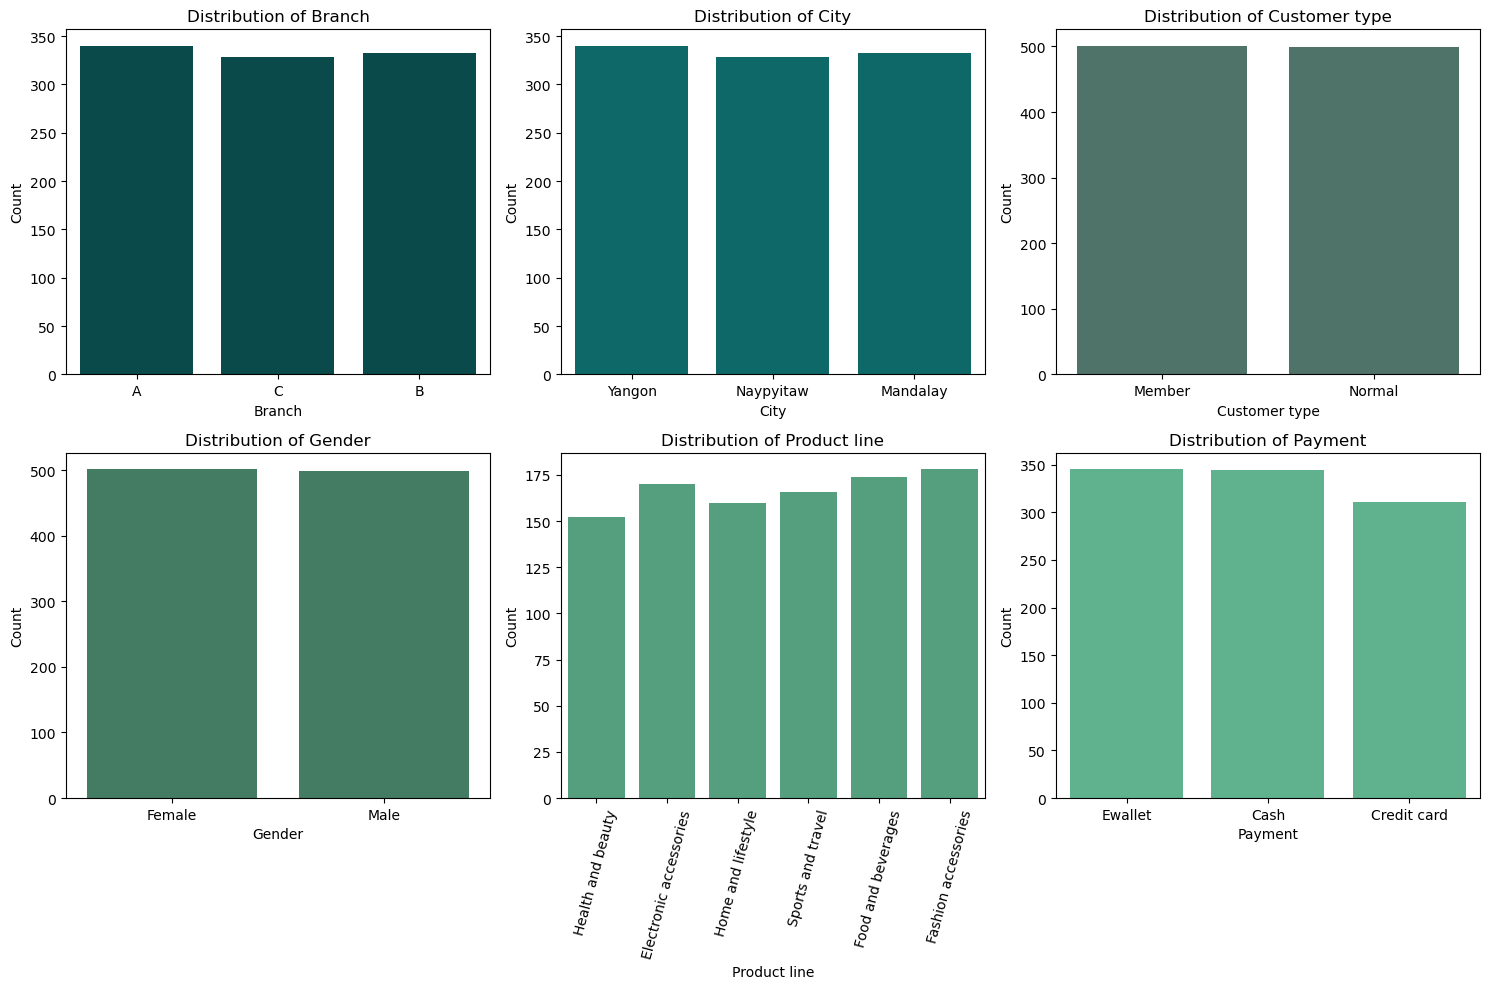

In [42]:
# Inspecting the distribution of categorical columns
# Define the columns to visualize
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
custom_colors = ['#005555', '#007777', '#49796b', '#398564', '#49ab81', '#52bf90']  # Define the custom colors

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot countplots for each column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i], color=custom_colors[i])  # Use one color per plot
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels for better readability if there are many categories
    if column == 'Product line':  # Adjust specifically for 'Product line'
        axes[i].tick_params(axis='x', rotation=75)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Distribution of Numeric Columns
- There is an almost uniform distribution across the quantities.
- The `Unit price` distribution is almost uniform, with a higher peak at 100.
- Most sales have a cost between 0 and 300, with sales after 300 reducing as `cogs` increase.
- The distributions of `cogs`,`tax 5%`,`Total`,`gross income` are similar because they are associated. A high value in one affects the other and vice versa.
- The distribution of `ratings` is somehow uniform with the majority of the ratings between 6 and 8.

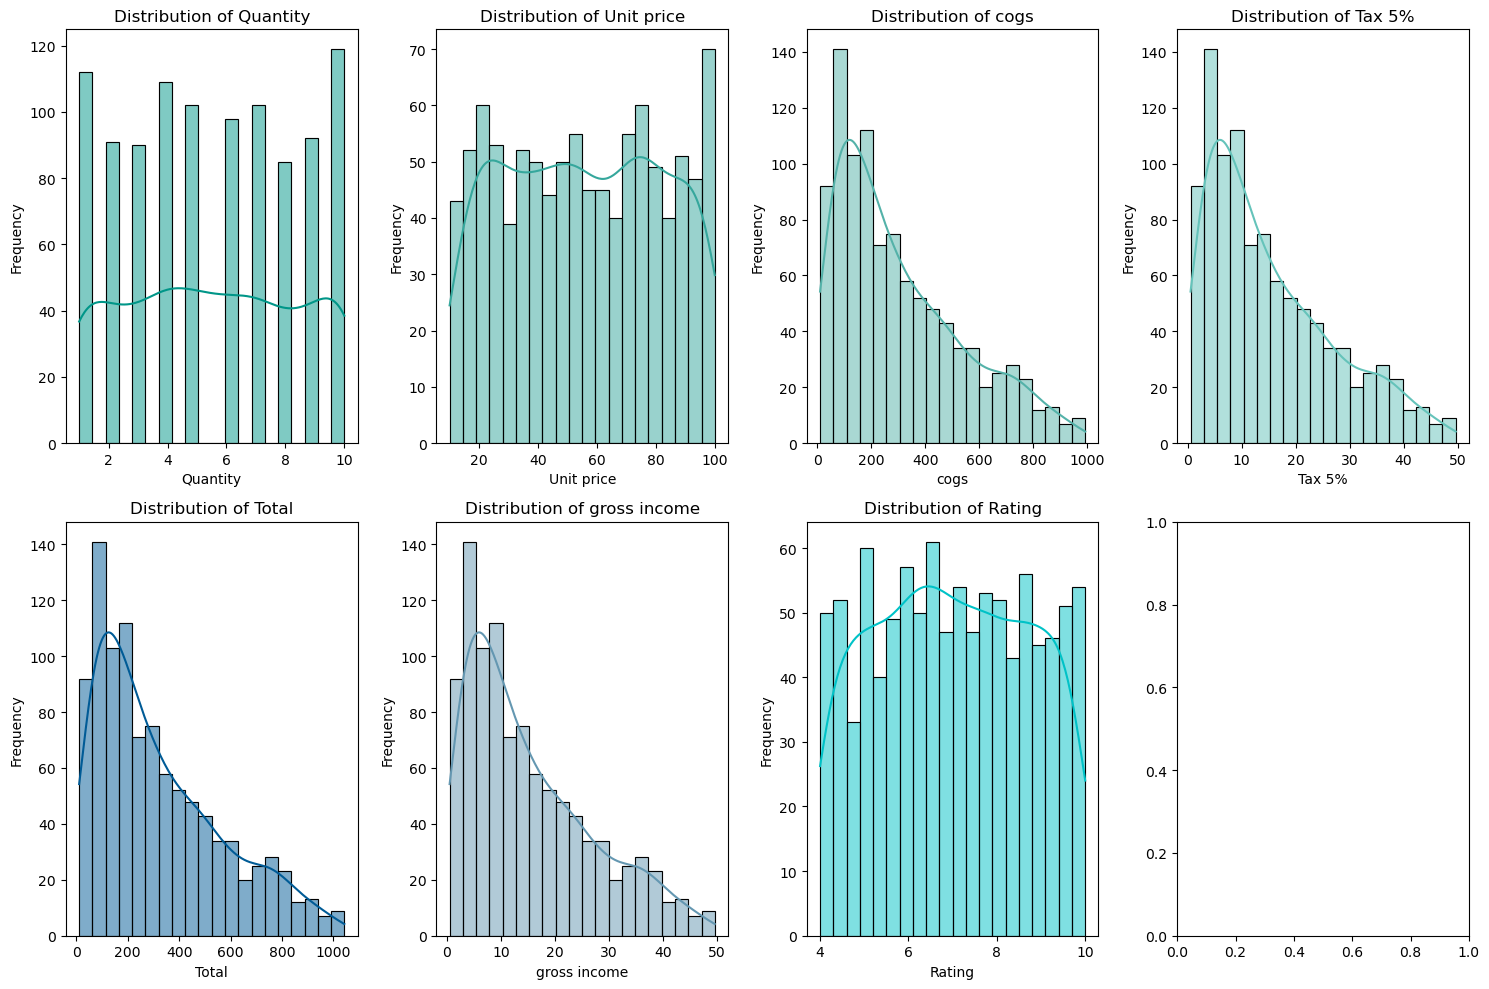

In [43]:
# Investigating the distribution of the numerical columns
# Define the numerical columns to visualize
numerical_columns = ['Quantity', 'Unit price', 'cogs', 'Tax 5%','Total', 'gross income', 'Rating']
custom_colors = ['#009688', '#35a79c', '#54b2a9', '#65c3ba', '#005b96', '#6497b1','#00c2c7']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))  # Adjust rows and columns based on the number of columns
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i], bins=20, color=custom_colors[i])  # KDE adds a smooth curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Sales Overview
- There is a total of **1000** sales with a value of **322,966.75** averaging **322.97** per sale.

In [44]:
# Sales overview
total_sales = data['Total'].sum()
average_sales = data['Total'].mean()
total_transactions = data['Invoice ID'].nunique()

print(f"Total Sales: {total_sales:.2f}")
print(f"Average Sales per Transaction: {average_sales:.2f}")
print(f"Total Transactions: {total_transactions}")

Total Sales: 322966.75
Average Sales per Transaction: 322.97
Total Transactions: 1000


### Sales by Branch/City
- There are 3 branches in which each branch is in a different city. Branch A - Yangon, B - Mandalay, C - Naypyitaw 
- There is a slight difference in the total sales across the branches with branch C a bit higher.

Sales by City and Branch:
---------------------------------------
City       Branch
Naypyitaw  C         110568.7065
Yangon     A         106200.3705
Mandalay   B         106197.6720
Name: Total, dtype: float64
---------------------------------------


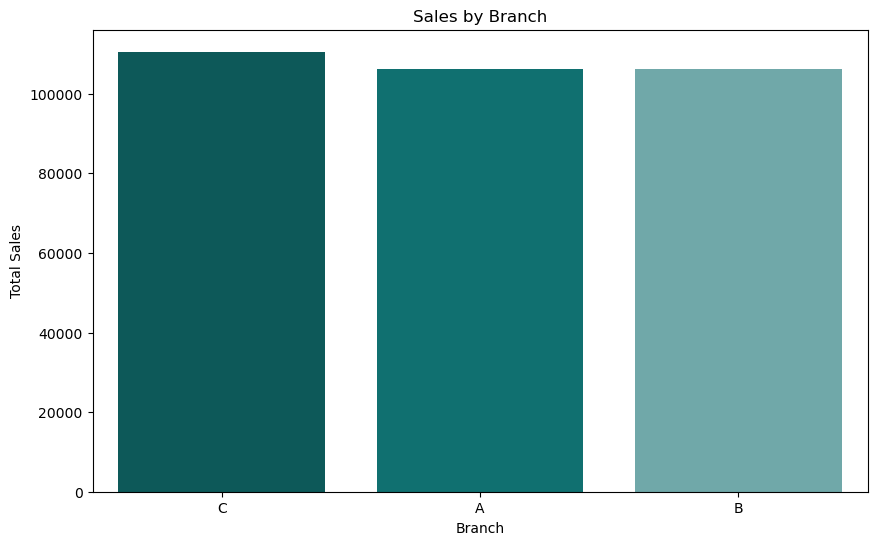

In [45]:
# Sales by City and Branch
print("Sales by City and Branch:")
print('---------------------------------------')
print(data.groupby(['City','Branch'])['Total'].sum().sort_values(ascending=False))
print('---------------------------------------')

# Sales by Branch
sales_by_branch = data.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Plotting Sales by Branch with the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_branch.index, y=sales_by_branch.values, hue=sales_by_branch.index, 
            palette=sns.color_palette(["#006666", "#008080", "#66b2b2"]), legend=False)
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

### Sales by Product Line
- **Food and beverages** has the most sales while **health and beauty** has the least sales.


Sales by Product Line:
--------------------------------------
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64
--------------------------------------


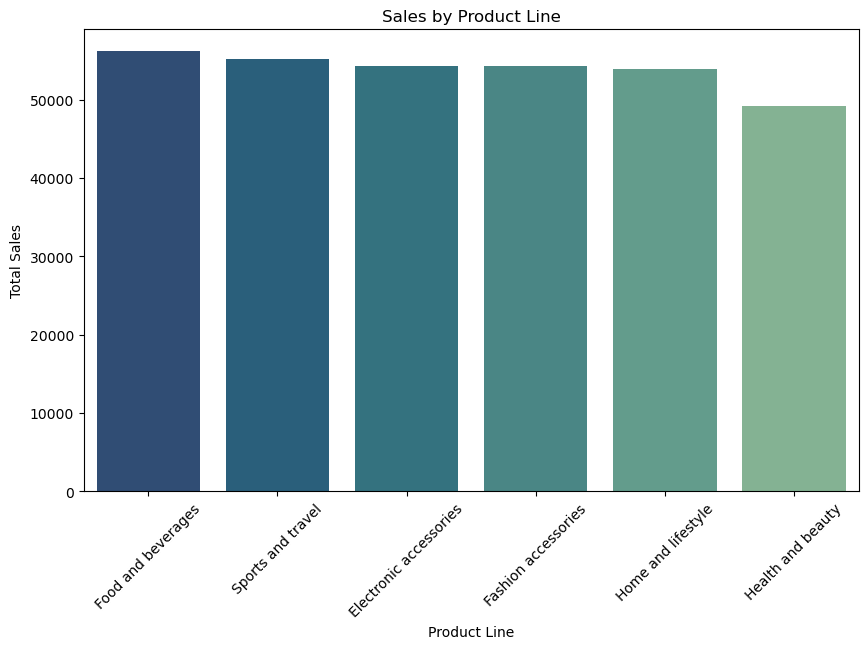

In [46]:
# Sales by Product Line
sales_by_product_line = data.groupby('Product line',observed=False)['Total'].sum().sort_values(ascending=False)
print("\nSales by Product Line:")
print('--------------------------------------')
print(sales_by_product_line)
print('--------------------------------------')

# Plot for Sales by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values, hue= sales_by_product_line.index, palette='crest_r')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Sales by Customer Type and Gender
- `Customer type`: There are slightly more ***Member*** customer sales than ***Normal*** customer sales.
- `Gender`: More sales were generated from females than males.


Sales by Customer Type:
Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


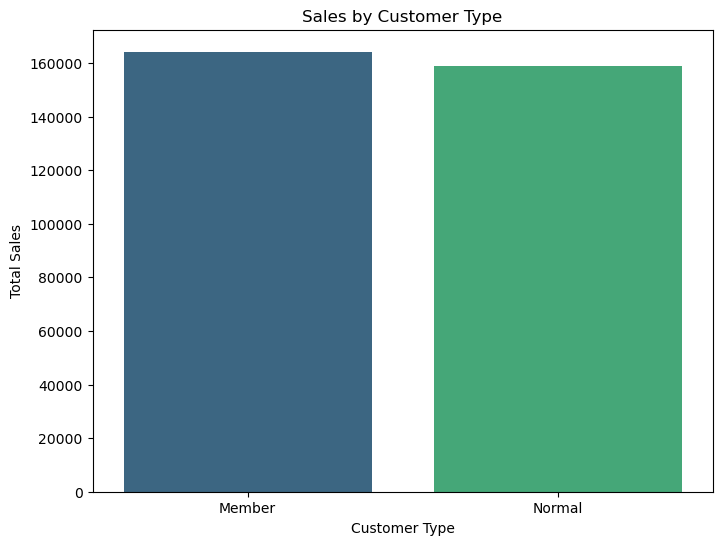

-----------------------------------------------------------------------------------------------------------

Sales by Gender:
Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


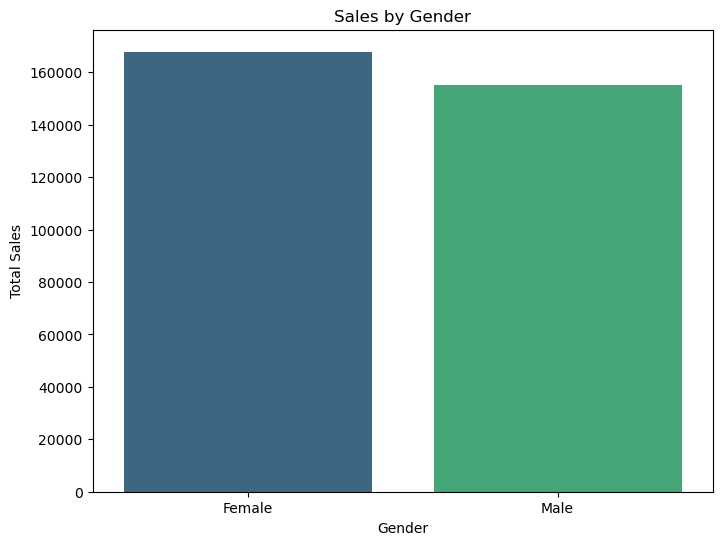

In [47]:
# Sales by Customer Type
sales_by_customer_type = data.groupby('Customer type')['Total'].sum().sort_values(ascending=False)
print("\nSales by Customer Type:")
print(sales_by_customer_type)

# Plot for Sales by Customer Type
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, hue =sales_by_customer_type.index, palette='viridis')
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()
print('-----------------------------------------------------------------------------------------------------------')
# Sales by Gender
sales_by_gender = data.groupby('Gender')['Total'].sum().sort_values(ascending=False)
print("\nSales by Gender:")
print(sales_by_gender)

# Plot for Sales by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, hue =sales_by_gender.index, palette='viridis')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

### Sales Trends Over Time (Date)
- There are noticeable peaks in sales every 7 days during the 3 months which could explained by more sales during weekends.

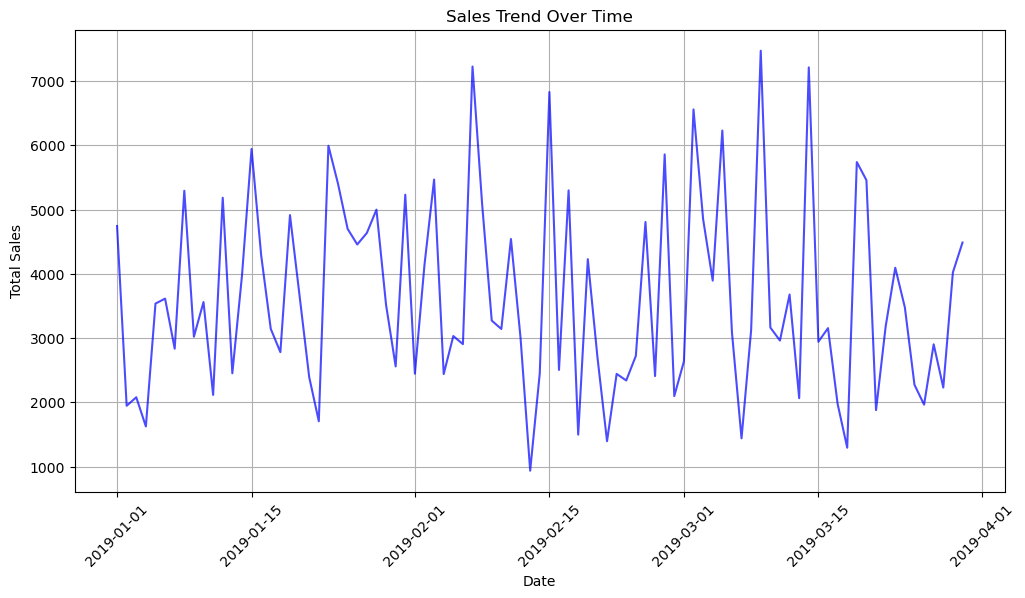

In [48]:
# Sales Trend by Date (daily)
sales_by_date = data.groupby('Date')['Total'].sum()

# Plotting sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, color="b",alpha=0.7)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Sales trend by Hour of day
- **1900hrs** is the time with the **most purchases** since most people at this time are making their way home from work.
- There is a noticeable sales peak at **1300hrs** which is during the lunch hour.

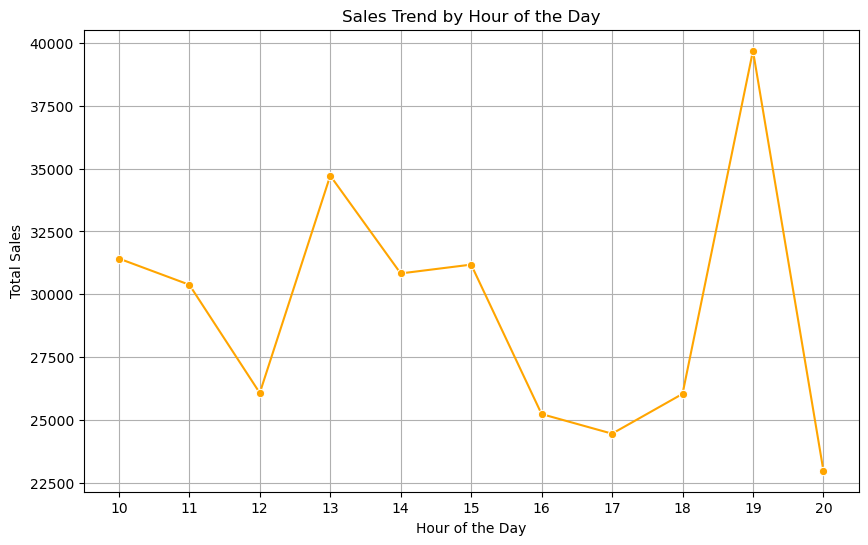

In [59]:
# Extract the hour from the 'Time' column
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Group by the hour and calculate total sales
sales_by_hour = data.groupby('Hour')['Total'].sum()

# Plotting the sales trend by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o', color='orange')
plt.title('Sales Trend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(10,21))  # Set x-axis ticks to show all hours (0-23)
plt.grid(True)
plt.show()

#### Hourly Sales Trend by Branch
- At `Branch A`, sales tend to peak at 1100hrs and 1500hrs.
- At `Branch B`, sales peak at 1900hrs which is similar to the overall trend.
- At `Branch C`, sales tend to peak at 1300hrs and 1900hrs.

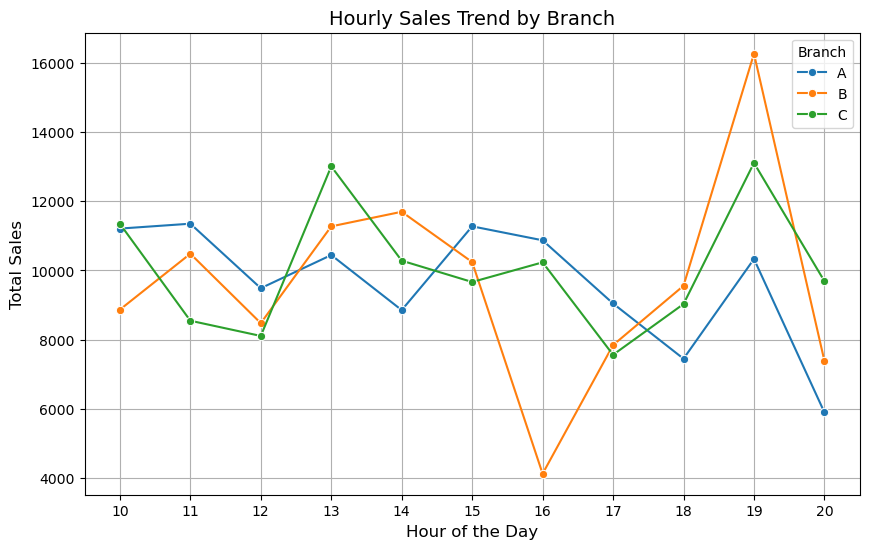

In [58]:
# Group by Hour and Branch and calculate total sales
sales_by_hour_branch = data.groupby(['Hour', 'Branch'])['Total'].sum().reset_index()

# Plotting the sales trend by hour for each branch
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_hour_branch, x='Hour', y='Total', hue='Branch', marker='o')
plt.title('Hourly Sales Trend by Branch', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(10, 21))  # Restrict x-axis to business hours (10 AM to 8 PM)
plt.legend(title='Branch')
plt.grid(True)
plt.show()

### Sales by Payment Method
- ***Cash*** payment generates slightly more sales than the other payment modes with ***credit card*** contributing to the lowest sales.

--------------------------------------
Sales by Payment Method:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64
--------------------------------------


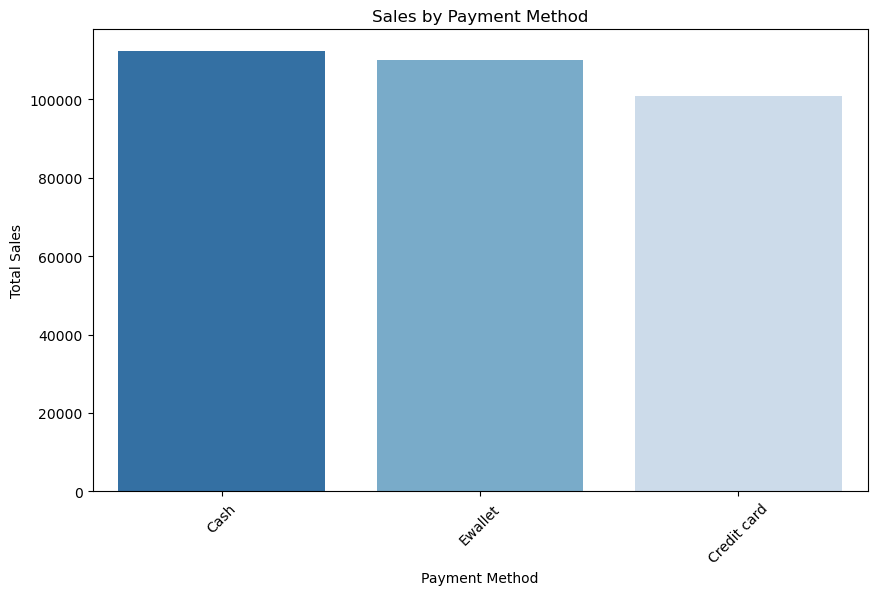

In [51]:
# Sales by Payment Method
sales_by_payment = data.groupby('Payment')['Total'].sum().sort_values(ascending=False)
print('--------------------------------------')
print("Sales by Payment Method:")
print(sales_by_payment)
print('--------------------------------------')

# Sales by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, hue=sales_by_payment.index,palette='Blues_r')
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### Payment Methods by Branch
- At `Branch A`, most purchases are made using ***Ewallet***.
- At `Branch B`, most purchases are made using ***Ewallet***.
- At `Branch C`, most purchases are made using ***Cash***.

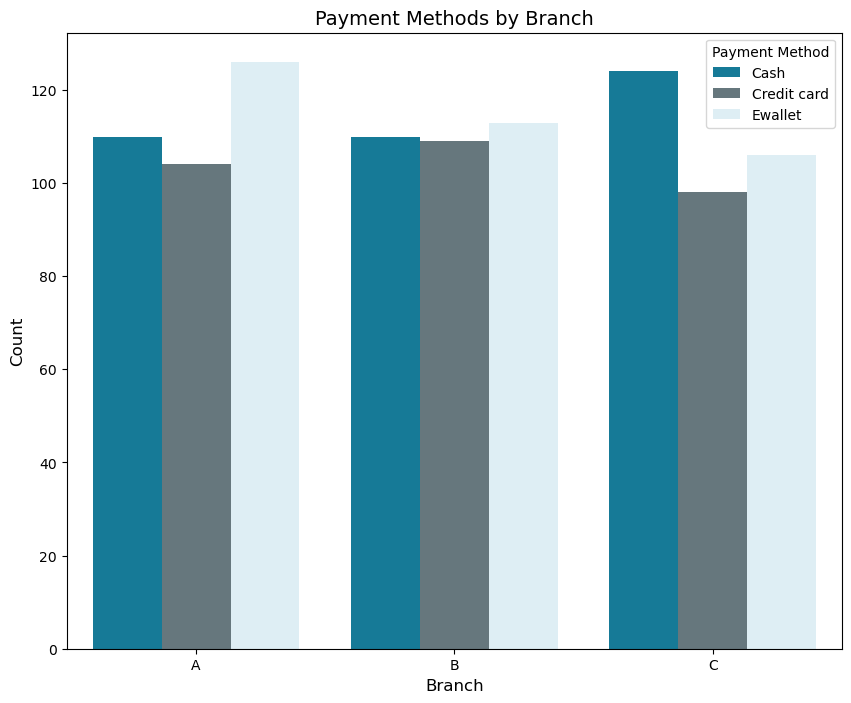

In [52]:
# Grouping data to count payment methods by branch
payment_by_branch = data.groupby(['Branch', 'Payment']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=payment_by_branch, x='Branch', y='Count', hue='Payment', 
            palette=sns.color_palette(['#0086ad','#627981','#daeff8']))
plt.title('Payment Methods by Branch', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Payment Method')
plt.show()

### Sales and Quantity Relationship (Scatter plot) by City
- There is no relationship between cities and sales with quantity.
- There is some positive correlation between `Total` and `Quantity`, higher quantities generate higher sales.

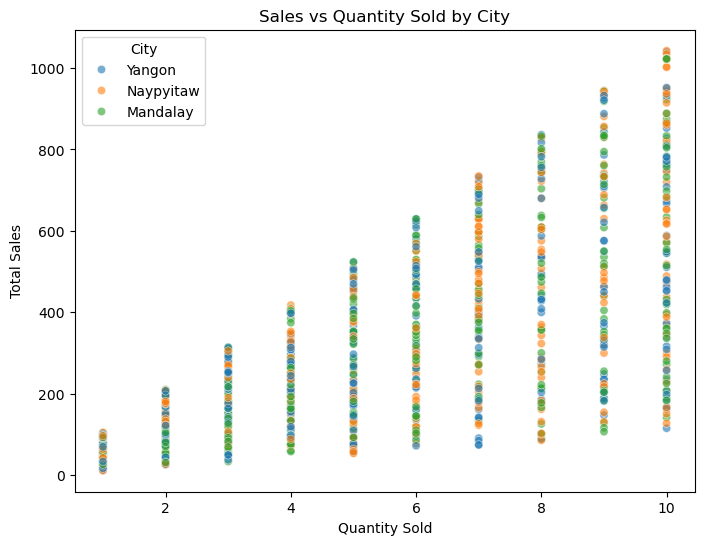

In [53]:
# Scatter plot for Quantity vs Total Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Quantity'], y=data['Total'], color='green', alpha=0.6,hue=data['City'])
plt.title('Sales vs Quantity Sold by City')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()

### Rating Distribution
- Rating has an almost uniform distribution with majority of the ratings between 6 and 8.

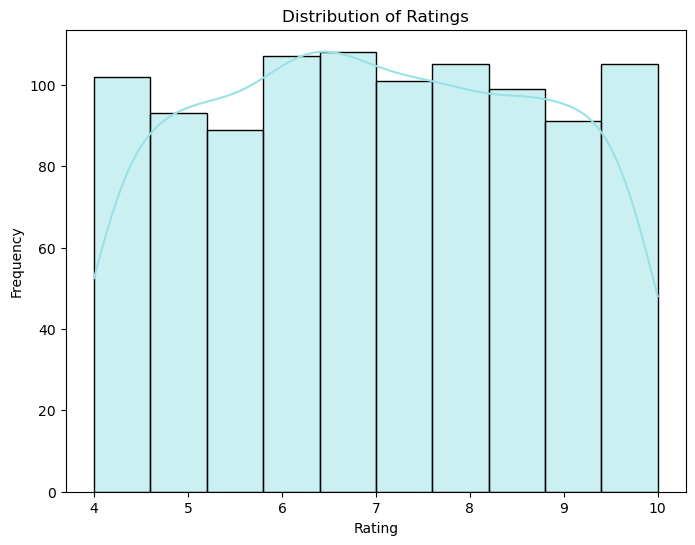

In [54]:
# Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], kde=True, bins=10, color='#98e2e5')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Ratings Across the Branches
- `Branch A` and `C` have similar ratings with a higher median of about 7.1 while `Branch B` has a lower ratings distribution and a lower median rating.

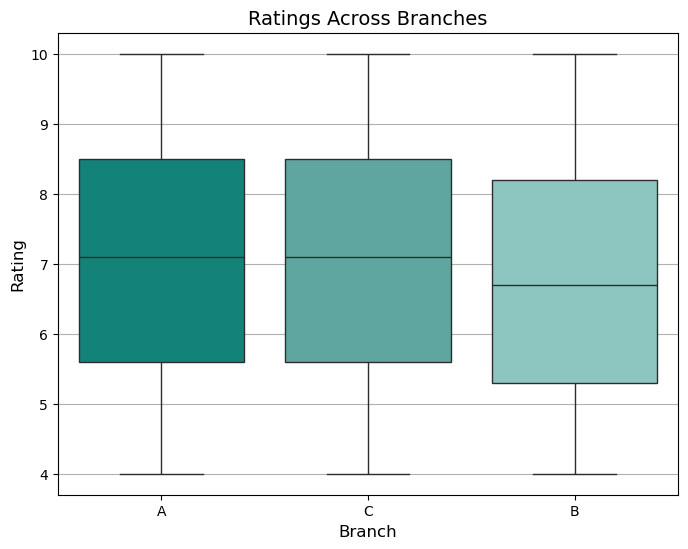

In [55]:
# Boxplot for Ratings Across Branches
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Branch', y='Rating', hue='Branch', dodge=False, palette=sns.color_palette(['#009688','#54b2a9','#83d0c9']))
plt.title('Ratings Across Branches', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y')
plt.show()

#### Ratings by Product Line
- **Food and beverages** sales have highest ratings while **Electronics and accessories** and **sports and travel** have generally lower ratings.

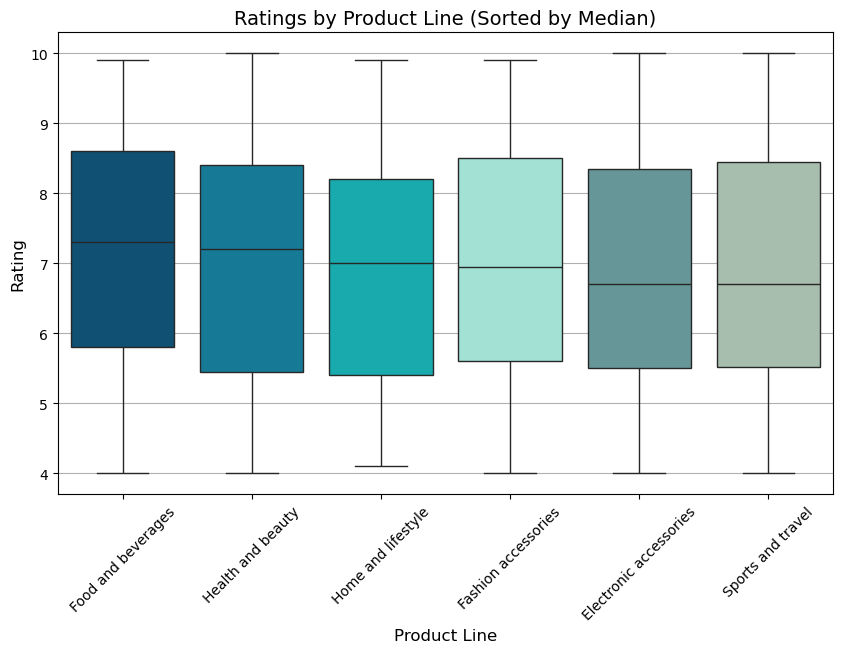

In [56]:
# Calculate medians for each Product Line
product_line_medians = data.groupby('Product line',observed=False)['Rating'].median().sort_values(ascending=False)

# Reorder the Product Line column based on the medians
data['Product line'] = pd.Categorical(data['Product line'], categories=product_line_medians.index, ordered=True)

# Boxplot for Ratings by Product Line (sorted by median)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Product line', y='Rating', hue='Product line', dodge=False, 
            palette=sns.color_palette(['#005582','#0086ad','#00c2c7','#97ebdb','#5f9ea0','#a3c1ad',]))
plt.title('Ratings by Product Line (Sorted by Median)', fontsize=14)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

### Correlation Matrix of Numerical Features
- The majority of the associated columns like `Total`,`cogs`,`Tax 5%` and `gross income` show a **perfect correlation**.
- There is a **strong positive relationship** between `Quantity` and `cogs`,`Tax 5%`, `gross income`, and `Total`.
- There is a **moderate positive relationship** between `Unit price` and `cogs`,`Tax 5%`, `gross income`, and `Total`.
- `Rating` has **no evident relationship** with any of the other numerical columns.

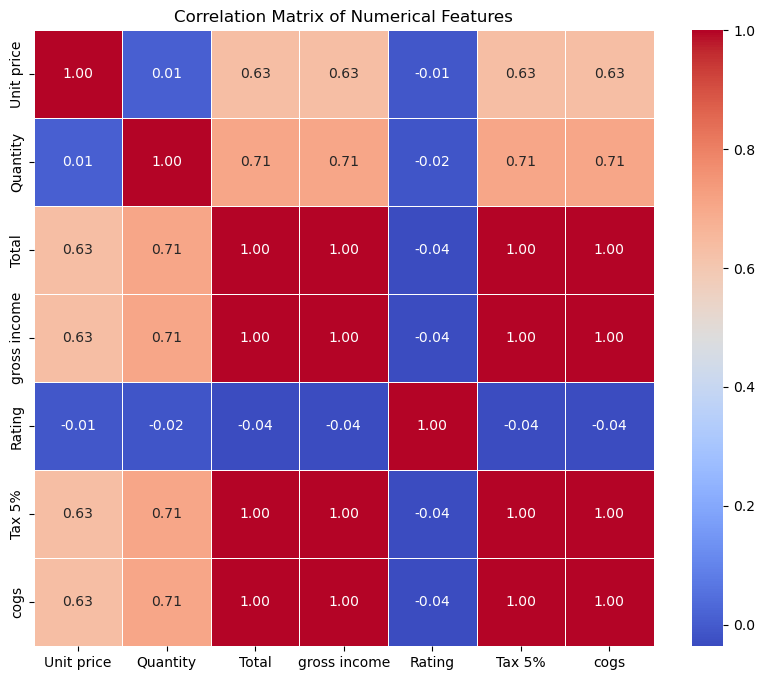

In [57]:
# Correlation matrix of numerical columns
numerical_columns = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating', 'Tax 5%', 'cogs']
correlation_matrix = data[numerical_columns].corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Conclusion
The analysis of the supermarket sales data revealed key insights into sales trends, customer preferences, and product performance. The data shows consistent and evenly distributed sales across branches, cities, customer types, and genders. However, notable differences emerge in sales by product line, payment methods, and hourly trends.
- **Sales Performance:** Sales are evenly distributed across branches and cities, with Branch C (Naypyitaw) generating slightly higher revenue. Product line performance highlights Food and Beverages as the leading category, while Health and Beauty lags behind.
- **Customer Insights:** Female customers contributed slightly more to sales, and members made more purchases compared to non-members. Ratings for branches and product lines show some variation, with Branch B and certain product lines like Electronics and Accessories receiving relatively lower ratings.
- **Temporal Trends:** Sales peak during weekends and specific hours (1300hrs and 1900hrs), likely due to lunchtime and end-of-day shopping behaviors.
- **Payment Methods:** Ewallet is the most used payment method across branches, except for Branch C, where Cash dominates. Credit card usage is the least popular overall.
- **Correlation and Ratings:** There is a strong positive correlation between quantity, cost of goods sold (cogs), tax, gross income, and total sales, indicating that increasing quantities contribute to higher sales revenue. Ratings have no significant relationship with other numerical features, suggesting external factors may influence customer satisfaction.

## Recommendations
To act on the insights derived from the analysis I would recommend the following:

**Branch and City Strategy:**
- Investigate Branch B’s slightly lower ratings to identify potential operational or customer service challenges.
- Consider targeted marketing strategies in cities like Yangon and Mandalay to further boost sales.

**Product Line Focus:**
- Increase inventory and marketing efforts for high-performing product lines like Food and Beverages.
- Explore strategies to improve sales and customer interest in Health and Beauty products, such as promotions or partnerships with beauty influencers.

**Customer Engagement:**
- Develop loyalty programs or incentives for both Member and Normal customers to maintain the balanced distribution of customer types.
- Tailor promotions and product offerings based on gender-specific preferences to capitalize on the higher sales from female customers.

**Optimizing Sales Timing:**
- Schedule special promotions or discounts during peak hours (1300hrs and 1900hrs) to maximize sales.
- Introduce weekend-specific campaigns to capitalize on the sales surge during those days.

**Payment Methods:**
- Promote credit card payment options through discounts or cashback offers to encourage its adoption.
- Assess why Cash is dominant in Branch C and explore ways to promote digital payment methods like Ewallet for greater convenience and efficiency.

**Rating Improvement:**
- Conduct surveys or focus groups to understand why Branch B and certain product lines (e.g., Electronics and Accessories) have lower ratings and address any identified issues.
- Focus on maintaining the high rating performance of Food and Beverages by ensuring quality and customer satisfaction.

**Operational Insights:**
- Leverage the strong positive correlations between sales and quantities to optimize inventory planning and avoid stockouts for high-demand products.
- Monitor gross income and cogs to ensure cost efficiency while maintaining competitive pricing.